# Import Data

In [1]:
# Get Dataset
#Kaggle: https://www.kaggle.com/datasets/shivamb/go-emotions-google-emotions-dataset

!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2023-03-19 17:46:34--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4003:802::2010, 2a00:1450:4003:80a::2010, 2a00:1450:4003:80d::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4003:802::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13,52M  10,1MB/s    in 1,3s    

2023-03-19 17:46:37 (10,1 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2023-03-19 17:46:37--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4003:80a::2010, 2a00:1450:4003:80d::2010, 2a00:1450:4003:802::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.co

In [36]:
#!pip install -q preprocessor
#!pip install -q contractions

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessor
import contractions
import re
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
tqdm.pandas()

In [2]:
DATA_PATH = 'data/full_dataset/goemotions_'

df1 = pd.read_csv(f'{DATA_PATH}1.csv')
df2 = pd.read_csv(f'{DATA_PATH}2.csv')
df3 = pd.read_csv(f'{DATA_PATH}3.csv')

frames = [df1,df2,df3]

df = pd.concat(frames)

df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


# Removing Useless Columns

In [20]:
len(df)

211225

In [21]:
df.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [22]:
df = df.drop(columns=['author','subreddit','link_id','parent_id','created_utc','rater_id'])

In [23]:
df.head()

,text,id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data Visualization

In [24]:
#View emotions easier
emotions = set(df.columns[3:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

Text(0.5, 1.0, 'Emotions by number of appearances')

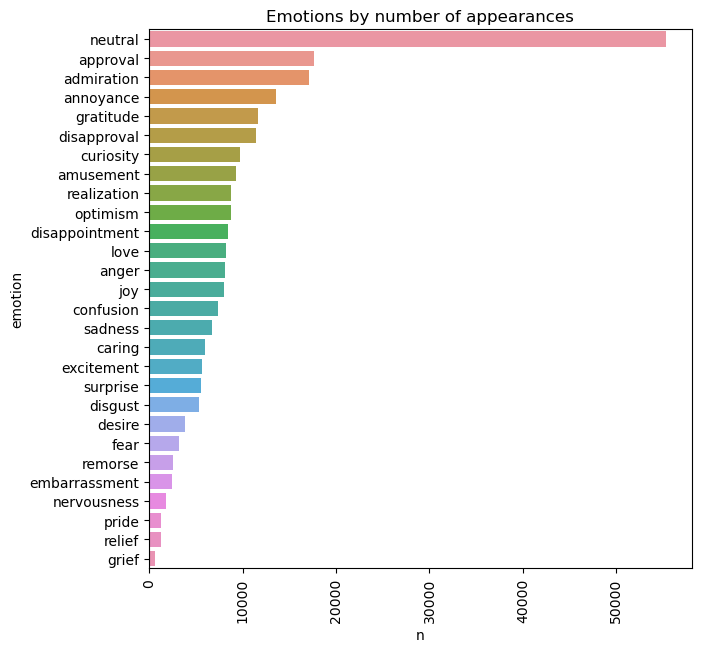

In [25]:
# Emotions Visualization by number of cases

temp = df[list(emotions)].sum(axis=0) \
    .reset_index() \
    .rename(columns={'index': 'emotion', 0: 'n'}) \
    .sort_values('n', ascending=False)

fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(axis='x', rotation=90)
sns.barplot(data=temp, x='n', 
            y='emotion',
            dodge=False,
            ax=ax).set_title('Emotions by number of appearances')

In [26]:
# Concatenating emotions

pos = {'admiration','amusement','approval','caring','desire','excitement','gratitude','joy','love',
       'optimism','pride','relief'}
neg = {'sadness','fear','embarrassment','disapproval','disappointment','annoyance','anger','nervousness',
       'remorse','grief','disgust'}
amb= {'realization','surprise','curiosity','confusion','neutral'}

In [27]:
# Emotions and data vis

print("Length of data: ", len(df))
print("Number of emotions: ", len(emotions))
print("Number of positive emotions: ", len(pos))
print("Number of negative emotions: ", len(neg))
print("Number of ambiguous emotions: ", len(amb))

Length of data:  211225
Number of emotions:  28
Number of positive emotions:  12
Number of negative emotions:  11
Number of ambiguous emotions:  5


In [28]:
# Emotions dataframe to later on aggregate

df_emotion = pd.DataFrame()
df_emotion['emotion'] = list(emotions)
df_emotion['group'] = ''
df_emotion['group'].loc[df_emotion['emotion'].isin(pos)] = 'positive'
df_emotion['group'].loc[df_emotion['emotion'].isin(neg)] = 'negative'
df_emotion['group'].loc[df_emotion['emotion'].isin(amb)] = 'ambiguous'

In [29]:
df_emotion.head()

,emotion,group
0,desire,positive
1,embarrassment,negative
2,fear,negative
3,sadness,negative
4,joy,positive


<Axes: xlabel='emotion', ylabel='true positive rate'>

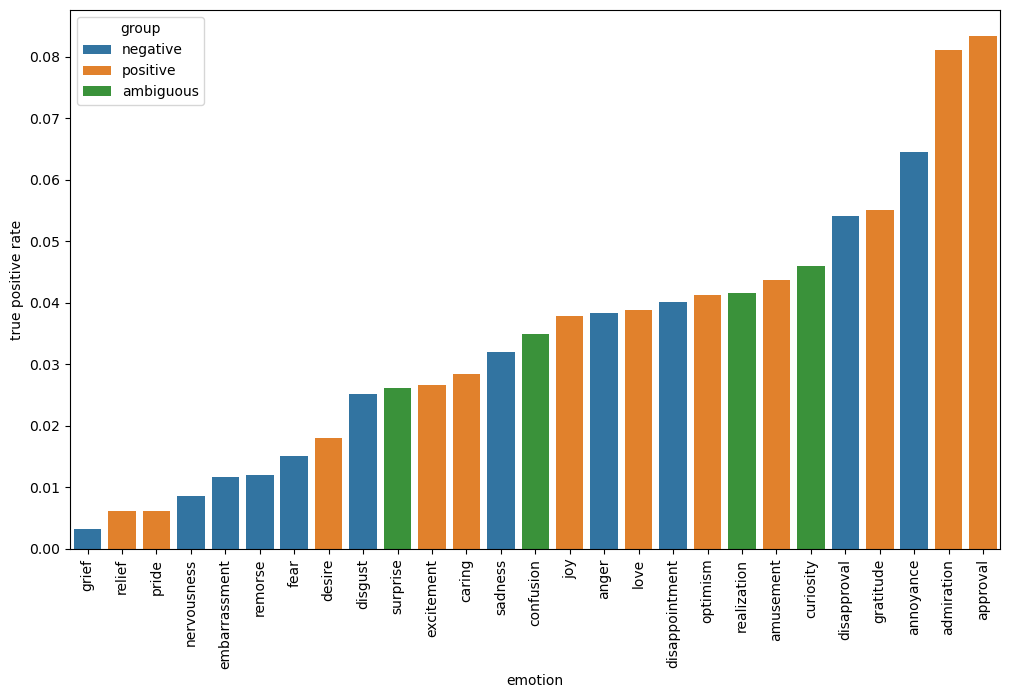

In [30]:
# Emotions by number of appearences but by group

temp = pd.DataFrame()
temp['true positive rate'] = df.iloc[:, 3:-1].mean(0)
temp['emotion'] = df.columns[3:-1]
temp = temp.merge(df_emotion, how='left', on='emotion')
temp = temp.sort_values('true positive rate')

fig, ax = plt.subplots(figsize=(12, 7))
ax.tick_params(axis='x', rotation=90)

sns.barplot(x=temp['emotion'], 
            y=temp['true positive rate'], 
            hue=temp['group'], 
            dodge=False)

# Cleaning DataSet

In [31]:
# FROM: https://www.kaggle.com/code/esknight/emotion-classification-final
# Function for cleaning text
def clean_text(text):
    re_number = re.compile('[0-9]+')
    re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    re_tag = re.compile('\[[A-Z]+\]')
    re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
    re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
    re_punc = re.compile('[?!,.\'\"]')
  
    text = re.sub(re_char, "", text) # Remove unknown character 
    text = contractions.fix(text) # Expand contraction
    text = re.sub(re_url, ' [url] ', text) # Replace URL with number
    text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
    #text = re.sub(re_punc, "", text) # Remove punctuation.
    text = text.lower() # Lower text
    text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

    return text

In [32]:
df = df.drop(columns=['id','example_very_unclear'])

In [33]:
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# Clean text
df['clean_text'] = df['text'].progress_apply(clean_text)

  0%|          | 0/211225 [00:00<?, ?it/s]

In [35]:
df[['text','clean_text']].sample(5)

,text,clean_text
30382,You can do it but it won’t be easy or fast kee...,you can do it but it will not be easy or fast ...
16273,Probably past 11 est at this point,probably past 11 est at this point
57115,What? I feel like temps shouldnt be in for 6 m...,what? i feel like temps should not be in for 6...
16421,I came across a really really really rare audi...,i came across a really really really rare audi...
36668,"It just has to be ""unequivocal and uncondition...",it just has to be unequivocal and unconditiona...


In [36]:
df['emotion'] = (df.iloc[:,1:] == 1).idxmax(1)

In [37]:
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,clean_text,emotion
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,that game hurt.,sadness
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,sexuality should not be a grouping category i...,admiration
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"you do right, if you do not care then fuck them!",neutral
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,man i love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"name was nowhere near them, he was by the falc...",neutral


In [38]:
# Organizing df

df = df[['clean_text','emotion'] + [col for col in df.columns if col not in ['text', 'emotion','clean_text']]]

In [39]:
df.head()

,clean_text,emotion,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,that game hurt.,sadness,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,sexuality should not be a grouping category i...,admiration,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"you do right, if you do not care then fuck them!",neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,man i love reddit.,love,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"name was nowhere near them, he was by the falc...",neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# Removing empty texts

print(df.shape)

df = df[df['clean_text'] != '']

print(df.shape)

(211225, 30)
(211211, 30)


# Train / Test

In [41]:
OUTPUT_DIR = 'training_data'
TRAIN_OUTPUT = 'training_data/train_dataset'
TEST_OUTPUT = 'training_data/test_dataset'

In [45]:
def create_train_test(dataframe, perc=1):
    if not os.path.exists(OUTPUT_DIR):
        os.mkdir(OUTPUT_DIR)
    train, test = train_test_split(dataframe, test_size=0.2, shuffle=True, random_state=0)
    train.to_csv(f'{TRAIN_OUTPUT}_{int(perc*100)}.csv', index=None)
    test.to_csv(f'{TEST_OUTPUT}_{int(perc*100)}.csv', index=None)

def load_train_test(perc=1):
    df_train = pd.read_csv(f'{TRAIN_OUTPUT}_{int(perc*100)}.csv')
    df_test = pd.read_csv(f'{TEST_OUTPUT}_{int(perc*100)}.csv')
    
    print(f"Train Size: {df_train.shape[0]}, number of columns: {df_train.shape[1]}")
    print(f"Test Size: {df_test.shape[0]}, number of columns: {df_test.shape[1]}")
    print(f"Total Size: {df_train.shape[0] + df_test.shape[0]}")
    
    print("Train first rows:")
    print(df_train.head())
    return df_train, df_test, df_train.shape[0], df_test.shape[0], df_train.shape[0] + df_test.shape[0]

In [46]:
# In case is not loaded
create_train_test(df,perc=0.1)

In [44]:
# Use this for full dataset
df_train, df_test, train_size, test_size, total_size = load_train_test(perc=0.1)

Train Size: 168968, number of columns: 30
Test Size: 42243, number of columns: 30
Total Size: 211211
Train first rows:
                                          clean_text      emotion  admiration  \
0              dj finding consistency makes me happy          joy           0   
1                                  that is wonderful   admiration           1   
2  the more i know someone, the less i want to kn...      neutral           0   
3  what scares me is that now that this happened,...  disapproval           0   
4  was expecting a horrifically broken ankle. you...  realization           0   

   amusement  anger  annoyance  approval  caring  confusion  curiosity  ...  \
0          0      0          0         0       0          0          0  ...   
1          0      0          0         0       0          0          0  ...   
2          0      0          0         0       0          0          0  ...   
3          0      0          0         0       0          0          0  ...   

In [15]:
def represent_train_test_balance(train_df,test_df):
    # Class representation for train/test DS
    train_GO = (train_df.loc[:,list(emotions)].sum(axis=0) / train_size) * 100
    test_GO = (test_df.loc[:,list(emotions)].sum(axis=0) / test_size) * 100
    
    # Unique dataset for visualization purposes
    
    ds_GO = pd.DataFrame(data=[train_GO, test_GO]).T.reset_index(drop=False)
    ds_GO.columns = ['Emotion', 'Train','Test']
    ds_GO = ds_GO.sort_values('Train',ascending=False)
    ds_GO = ds_GO.melt(id_vars='Emotion', var_name='Dataset', value_vars=['Train','Test'],
                      value_name='Percentage')
    
    # Display dataset
    
    display(ds_GO.head(10))
    
    print("Graph Visualization")
    
    plt.figure(figsize=(20,15))
    sns.barplot(x='Percentage', y='Emotion', data=ds_GO, orient='h', hue='Dataset')
    plt.title('Percentage of samples per emotion in train and test datasets', fontweight='bold', fontsize=20)
    plt.xlabel('Percentage of all samples', fontweight='bold', fontsize=16)
    plt.ylabel('Emotions', fontweight='bold', fontsize= 16)
    plt.show()

In [16]:
represent_train_test_balance(df_train, df_test)

NameError: name 'df_train' is not defined

# PRE-Test Models

In [6]:
# Imports
from transformers import DistilBertTokenizer, DistilBertModel, TrainingArguments, Trainer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from transformers.data.processors.utils import InputFeatures
import random
import torch
import platform
import sys
import sklearn as sk
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)


In [7]:
MAX_LEN = 256

In [ ]:
# Verify Lenght, doesnt need to run
def verify_sentence_length(df,column):
    print("DataFrame Sentence Lengths : ")
    list_length = [len(tokenizer.tokenize(sentence)) for sentence in df[column]]
    plt.hist(list_length)
    plt.show()
    print('Max Length Sentence in dataset: ', max(list_length))

verify_sentence_length(df_train,'clean_text')
verify_sentence_length(df_test,'clean_text')

print("Truncated training sequences: ", sum([len(tokenizer.tokenize(sentence)) > MAX_LEN for 
                                             sentence in df_train["clean_text"].to_list()]))

print("Truncated testing sequences: ", sum([len(tokenizer.tokenize(sentence)) > MAX_LEN for 
                                            sentence in df_test["clean_text"].to_list()]))

In [12]:
def create_label_map(emotions):
    label_map = { v:index for index, v in enumerate(list(emotions)) }
    print(label_map)
    return label_map

In [8]:
# source https://github.com/hazemhosny/Emotion-Sentiment-Analysis
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_path_or_name, max_len, label_map):
        super(ClassificationDataset).__init__()
        """
        Args:
        text (List[str]): List of the training text
        target (List[str]): List of the training labels
        tokenizer_name (str): The tokenizer name (same as model_name).
        max_len (int): Maximum sentence length
        label_map (Dict[str,int]): A dictionary that maps the class labels to integer
        """
        self.text = text
        self.target = target
        self.tokenizer_name = model_path_or_name
        self.tokenizer = DistilBertTokenizer.from_pretrained(model_path_or_name)
        self.max_len = max_len
        self.label_map = label_map
      

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = str(self.text[item])
        text = " ".join(text.split())
        
        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )      
        return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [13]:
def train_test(df_train,model_path_or_name,label_map):
  train_dataset = ClassificationDataset(
      df_train["clean_text"].to_list(),
      df_train["emotion"].to_list(),
      model_path_or_name,
      MAX_LEN,
      label_map
    )
  test_dataset = ClassificationDataset(
      df_test["clean_text"].to_list(),
      df_test["emotion"].to_list(),
      model_path_or_name,
      MAX_LEN,
      label_map
    )
  return train_dataset, test_dataset
  
def compute_metrics(p): 
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    precision = precision_score(p.label_ids,preds,average='macro')
    recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {       
      'macro_f1' : macro_f1,
      'Accuracy': acc,
      'Precision': precision,
      'Recall' : recall,
    }
    
def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic=False
    torch.backends.cudnn.benchmark = False
    
def device_to_use():
    has_gpu = torch.cuda.is_available()
    has_mps = getattr(torch,'has_mps',False)
    device = "mps" if getattr(torch,'has_mps',False) \
        else "gpu" if torch.cuda.is_available() else "cpu"

    print(f"Python Platform: {platform.platform()}")
    print(f"PyTorch Version: {torch.__version__}")
    print()
    print(f"Python {sys.version}")
    print(f"Pandas {pd.__version__}")
    print(f"Scikit-Learn {sk.__version__}")
    print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
    print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
    print(f"Target device is {device}")
    return device

def model_train(df_train, model_path_or_name, label_map):
  training_args = TrainingArguments( 
    output_dir= OUTPUT_DIR,    
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = False, # V100 / T4 GPU
    use_mps_device = True, # Mac Sylicon GPU
    per_device_train_batch_size = 32, 
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2, # scale batch size without needing more memory
    num_train_epochs= 4,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

  set_seed(training_args.seed)
  train_dataset, test_dataset = train_test(df_train,model_path_or_name,label_map)

  trainer = Trainer(
      model = model_init(),
      args = training_args,
      train_dataset = train_dataset,
      eval_dataset=test_dataset,
      compute_metrics=compute_metrics,
  )

  print(model_init())

  return training_args, trainer


def model_init(model_path_or_name, label_map):
    return AutoModelForSequenceClassification.from_pretrained(model_path_or_name, 
                                                              return_dict=True, num_labels=len(label_map))
                                              

# Pre-Trained Model - DistilBERT

In [32]:
model_path_or_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_path_or_name)
model = DistilBertModel.from_pretrained(model_path_or_name)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
device = device_to_use()

Python Platform: macOS-12.5-arm64-arm-64bit
PyTorch Version: 1.13.1

Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [46]:
label_map = create_label_map(emotions)
training_args, trainer = model_train(df_train, model_path_or_name, label_map)

/Users/vascosilva/miniconda3/envs/torch/lib/python3.9/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


KeyboardInterrupt: 

# Pre-Trained Model - BERT

In [5]:
from transformers import TFBertTokenizer


model_path_or_name = "bert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_path_or_name)
model = DistilBertModel.from_pretrained(model_path_or_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing DistilBertModel: ['bert.encoder.layer.1.attention.output.dense.weight', 'bert.encoder.layer.1.attention.self.query.bias', 'bert.encoder.layer.5.intermediate.dense.weight', 'bert.encoder.layer.3.attention.self.value.weight', 'bert.encoder.layer.2.output.dense.bias', 'bert.encoder.layer.5.attention.self.key.bias', 'bert.encoder.layer.9.attention.output.LayerNorm.weight', 'bert.encoder.layer.10.attention.output.dense.weight', 'bert.encoder.layer.5.attention.self.value.weight', 'bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.8.attention.self.value.weight', 'bert.encoder.layer.2.attention.output.LayerNorm.weight', 'bert.encoder.layer.11.attention.self.value.weight', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.1.attention.self.key.bias', 'bert.encoder.layer.9.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.